In [140]:
import pandas as pd
import numpy as np
import re
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import datetime
import emoji
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from text_processing_functions import *
import matplotlib.pyplot as plt

In [142]:
analyser = SentimentIntensityAnalyzer()

# Twitter

In [131]:
keywords_compound_sentiment = {}

In [143]:
mypath = "."
folder_name='Twitter Data/Cleaned Data'
file_path = f'{mypath}/{folder_name}/'
files = [filename for filename in os.listdir(file_path) if filename.endswith('.csv')]
files

['safe_distancing.csv',
 'safe_entry.csv',
 'circuit_breaker.csv',
 'panic_buying.csv',
 'Tracetogether.csv',
 'stay_home_notice.csv',
 'vaccination.csv',
 'covid-19.csv']

In [144]:
for file in files:
    tweets = pd.read_csv(f'{file_path}{file}') 

    vader_neg_sentiment = []
    vader_neu_sentiment = []
    vader_pos_sentiment = []
    vader_compound_sentiment = []

    for i in range(len(tweets)):
        score = analyser.polarity_scores(tweets.iloc[i]['tweet'])

        vader_neg_sentiment.append(score['neg'])
        vader_neu_sentiment.append(score['neu'])
        vader_pos_sentiment.append(score['pos'])
        vader_compound_sentiment.append(score['compound'])
    
    tweets['Vader_neg_score'] = vader_neg_sentiment
    tweets['Vader_neu_score'] = vader_neu_sentiment
    tweets['Vader_pos_score'] = vader_pos_sentiment
    tweets['Vader_compound_score'] = vader_compound_sentiment

    keyword = " ".join(file[:-4].split('_'))
    keywords_compound_sentiment[keyword] = round(tweets['Vader_compound_score'].mean(), 4)


In [145]:
del keywords_compound_sentiment['panic buying']
del keywords_compound_sentiment['covid-19']
keywords_compound_sentiment

{'safe distancing': 0.3785,
 'safe entry': 0.2589,
 'circuit breaker': 0.2276,
 'Tracetogether': 0.1513,
 'stay home notice': 0.0827,
 'vaccination': 0.0902}

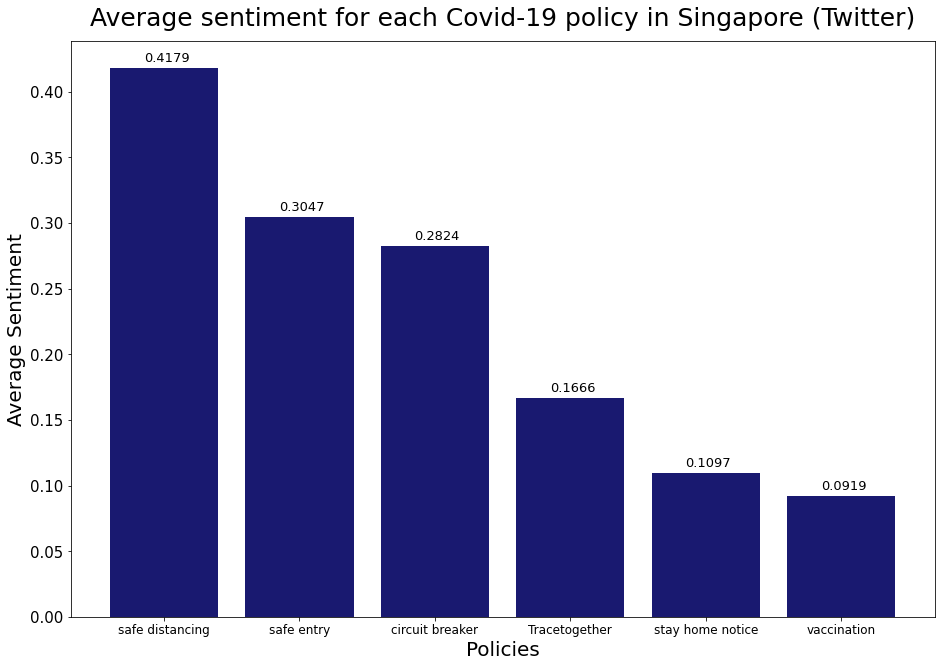

In [106]:
fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(keywords_compound_sentiment.keys())
avg_sentiment = list(keywords_compound_sentiment.values())
ax.bar(key_words, avg_sentiment, color='midnightblue')
# plt.plot(key_words, avg_sentiment, color='midnightblue', marker='o')
plt.title("Average sentiment for each Covid-19 policy in Singapore (Twitter)", fontsize = 25, pad=15)
plt.xlabel("Policies", fontsize = 20)
plt.ylabel("Average Sentiment",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
# plt.grid(True)
for i in range(len(key_words)):
    plt.text(x= i-0.15 , y = avg_sentiment[i]+0.005 , s=f"{avg_sentiment[i]}" , fontdict=dict(fontsize=13))

plt.tight_layout()
plt.show()

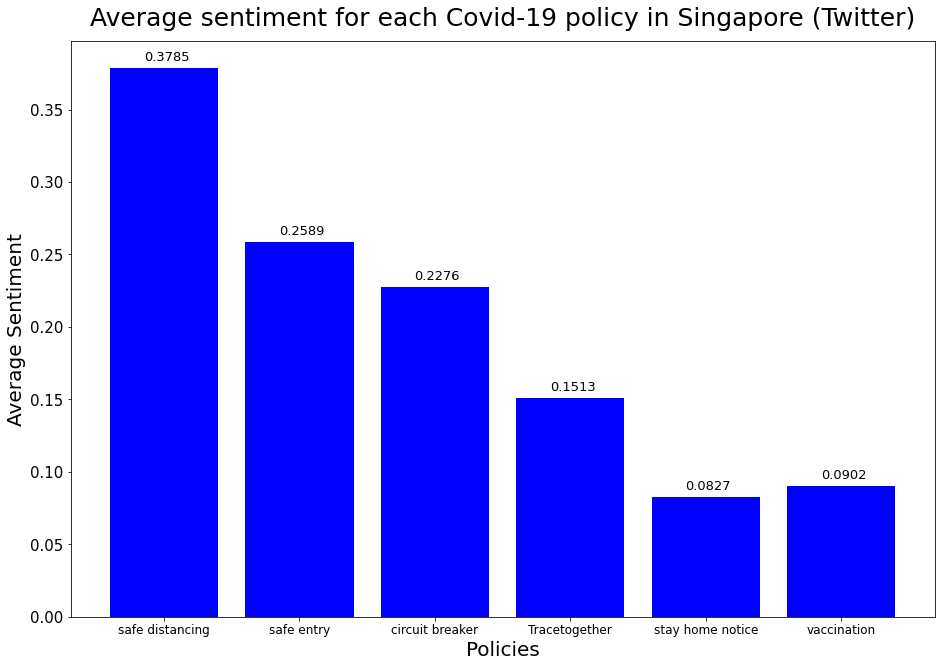

In [146]:
# using ntlk Vader sentiment package

fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(keywords_compound_sentiment.keys())
avg_sentiment = list(keywords_compound_sentiment.values())
ax.bar(key_words, avg_sentiment, color='blue')
# plt.plot(key_words, avg_sentiment, color='midnightblue', marker='o')
plt.title("Average sentiment for each Covid-19 policy in Singapore (Twitter)", fontsize = 25, pad=15)
plt.xlabel("Policies", fontsize = 20)
plt.ylabel("Average Sentiment",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
# plt.grid(True)
for i in range(len(key_words)):
    plt.text(x= i-0.15 , y = avg_sentiment[i]+0.005 , s=f"{avg_sentiment[i]}" , fontdict=dict(fontsize=13))

# Reddit

In [108]:
reddit_keywords_compound_sentiment = {}

In [155]:
mypath = "."
folder_name='Reddit Data/Cleaned Data'
file_path = f'{mypath}/{folder_name}/'
files = [filename for filename in os.listdir(file_path) if filename.endswith('.csv')]
files

['Reddit vaccination comments.csv',
 'Reddit circuit breaker comments.csv',
 'Reddit TraceTogether comments.csv']

In [110]:
for file in files:
    comments = pd.read_csv(f'{file_path}{file}') 

    vader_neg_sentiment = []
    vader_neu_sentiment = []
    vader_pos_sentiment = []
    vader_compound_sentiment = []

    for i in range(len(comments)):
        score = analyser.polarity_scores(comments.iloc[i]['comment_body'])

        vader_neg_sentiment.append(score['neg'])
        vader_neu_sentiment.append(score['neu'])
        vader_pos_sentiment.append(score['pos'])
        vader_compound_sentiment.append(score['compound'])
    
    comments['Vader_neg_score'] = vader_neg_sentiment
    comments['Vader_neu_score'] = vader_neu_sentiment
    comments['Vader_pos_score'] = vader_pos_sentiment
    comments['Vader_compound_score'] = vader_compound_sentiment

    keyword = file[7:-13]
    reddit_keywords_compound_sentiment[keyword] = round(comments['Vader_compound_score'].mean(), 4)

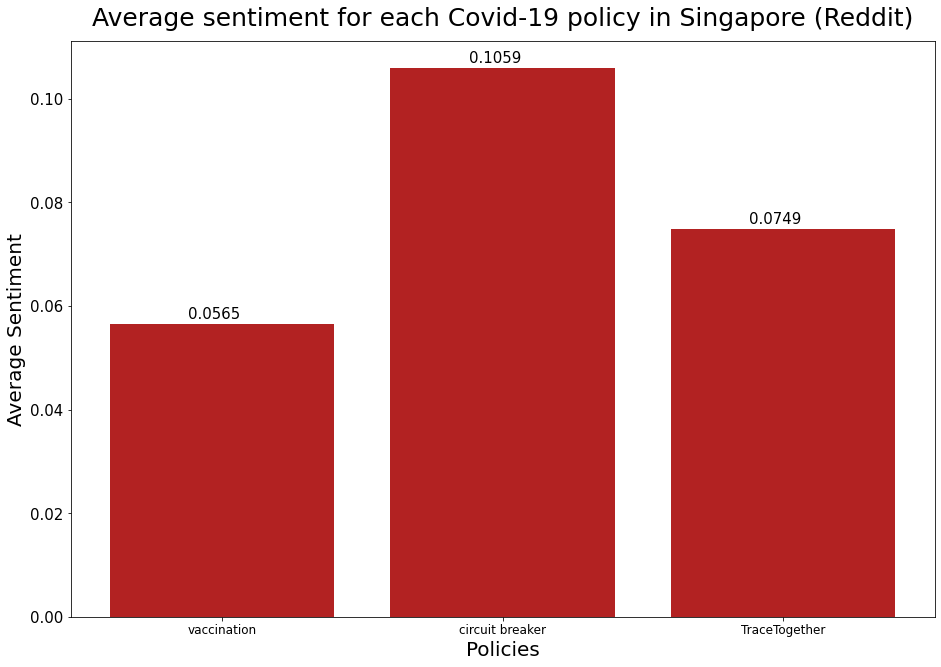

In [114]:
fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(reddit_keywords_compound_sentiment.keys())
avg_sentiment = list(reddit_keywords_compound_sentiment.values())
ax.bar(key_words, avg_sentiment, color='firebrick')
# plt.plot(key_words, avg_sentiment, color='midnightblue', marker='o')
plt.title("Average sentiment for each Covid-19 policy in Singapore (Reddit)", fontsize = 25, pad=15)
plt.xlabel("Policies", fontsize = 20)
plt.ylabel("Average Sentiment",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
# plt.grid(True)
for i in range(len(key_words)):
    plt.text(x= i-0.12 , y = avg_sentiment[i]+0.001 , s=f"{avg_sentiment[i]}" , fontdict=dict(fontsize=15))

plt.tight_layout()
plt.show()

In [153]:
reddit_keywords_compound_sentiment_textblob = {}

In [157]:
# using TextBlob

for file in files:
    comments = pd.read_csv(f'{file_path}{file}') 

    textblob_sentiment_score = []

    for i in range(len(comments)):
        analysis = TextBlob(comments.iloc[i]['comment_body'])
        textblob_sentiment_score.append(analysis.sentiment.polarity)
    
    comments['TextBlob_polarity_score'] = textblob_sentiment_score

    keyword = file[7:-13]
    reddit_keywords_compound_sentiment_textblob[keyword] = round(comments['TextBlob_polarity_score'].mean(), 4)

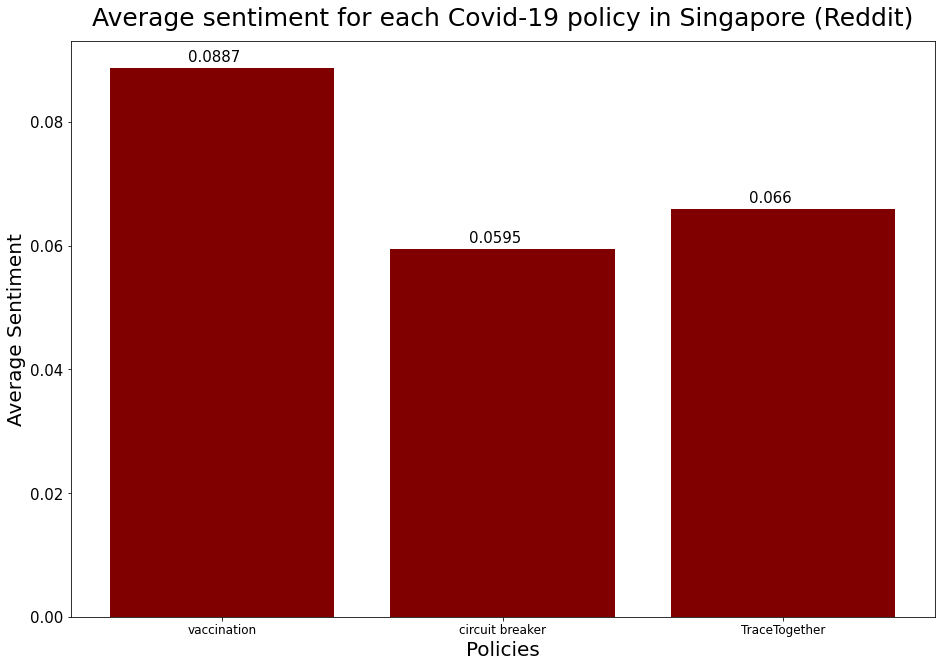

In [159]:
fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(reddit_keywords_compound_sentiment_textblob.keys())
avg_sentiment = list(reddit_keywords_compound_sentiment_textblob.values())
ax.bar(key_words, avg_sentiment, color='maroon')
# plt.plot(key_words, avg_sentiment, color='midnightblue', marker='o')
plt.title("Average sentiment for each Covid-19 policy in Singapore (Reddit)", fontsize = 25, pad=15)
plt.xlabel("Policies", fontsize = 20)
plt.ylabel("Average Sentiment",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
# plt.grid(True)
for i in range(len(key_words)):
    plt.text(x= i-0.12 , y = avg_sentiment[i]+0.001 , s=f"{avg_sentiment[i]}" , fontdict=dict(fontsize=15))

plt.tight_layout()
plt.show()

# Instagram

In [123]:
insta_keywords_compound_sentiment = {}

In [115]:
mypath = "."
folder_name_1='Instagram Data/Gov.sg/Cleaned Data'
folder_name_2='Instagram Data/Mothership/Cleaned Data'
file_path_1 = f'{mypath}/{folder_name_1}/'
file_path_2 = f'{mypath}/{folder_name_2}/'
files_1 = [filename for filename in os.listdir(file_path_1) if filename.endswith('.csv')]
files_2 = [filename for filename in os.listdir(file_path_2) if filename.endswith('.csv')]
files_1

['CNY.csv', 'Phase 3.csv', 'Phase 2.csv', 'Vaccination.csv']

In [124]:
for file in files_1:
    comments = pd.read_csv(f'{file_path_1}{file}') 

    vader_neg_sentiment = []
    vader_neu_sentiment = []
    vader_pos_sentiment = []
    vader_compound_sentiment = []

    for i in range(len(comments)):
        score = analyser.polarity_scores(comments.iloc[i]['comment'])

        vader_neg_sentiment.append(score['neg'])
        vader_neu_sentiment.append(score['neu'])
        vader_pos_sentiment.append(score['pos'])
        vader_compound_sentiment.append(score['compound'])
    
    comments['Vader_neg_score'] = vader_neg_sentiment
    comments['Vader_neu_score'] = vader_neu_sentiment
    comments['Vader_pos_score'] = vader_pos_sentiment
    comments['Vader_compound_score'] = vader_compound_sentiment

    keyword = file[:-4]
    if keyword not in insta_keywords_compound_sentiment:
        insta_keywords_compound_sentiment[keyword] = [round(comments['Vader_compound_score'].sum(), 4), len(comments)]
    else:
        insta_keywords_compound_sentiment[keyword][0] += round(comments['Vader_compound_score'].sum(), 4)
        insta_keywords_compound_sentiment[keyword][1] += len(comments)

for file in files_2:
    comments = pd.read_csv(f'{file_path_2}{file}') 

    vader_neg_sentiment = []
    vader_neu_sentiment = []
    vader_pos_sentiment = []
    vader_compound_sentiment = []

    for i in range(len(comments)):
        score = analyser.polarity_scores(comments.iloc[i]['comment'])

        vader_neg_sentiment.append(score['neg'])
        vader_neu_sentiment.append(score['neu'])
        vader_pos_sentiment.append(score['pos'])
        vader_compound_sentiment.append(score['compound'])
    
    comments['Vader_neg_score'] = vader_neg_sentiment
    comments['Vader_neu_score'] = vader_neu_sentiment
    comments['Vader_pos_score'] = vader_pos_sentiment
    comments['Vader_compound_score'] = vader_compound_sentiment

    keyword = file[:-4]
    if keyword not in insta_keywords_compound_sentiment:
        insta_keywords_compound_sentiment[keyword] = [round(comments['Vader_compound_score'].sum(), 4), len(comments)]
    else:
        insta_keywords_compound_sentiment[keyword][0] += round(comments['Vader_compound_score'].sum(), 4)
        insta_keywords_compound_sentiment[keyword][1] += len(comments)

for k, v in insta_keywords_compound_sentiment.items():
    insta_keywords_compound_sentiment[k] = round(v[0]/v[1], 4)

In [125]:
insta_keywords_compound_sentiment

{'CNY': 0.2024,
 'Phase 3': 0.2182,
 'Phase 2': 0.1658,
 'Vaccination': 0.1574,
 'TraceTogether': 0.0728,
 'Others': 0.0253}

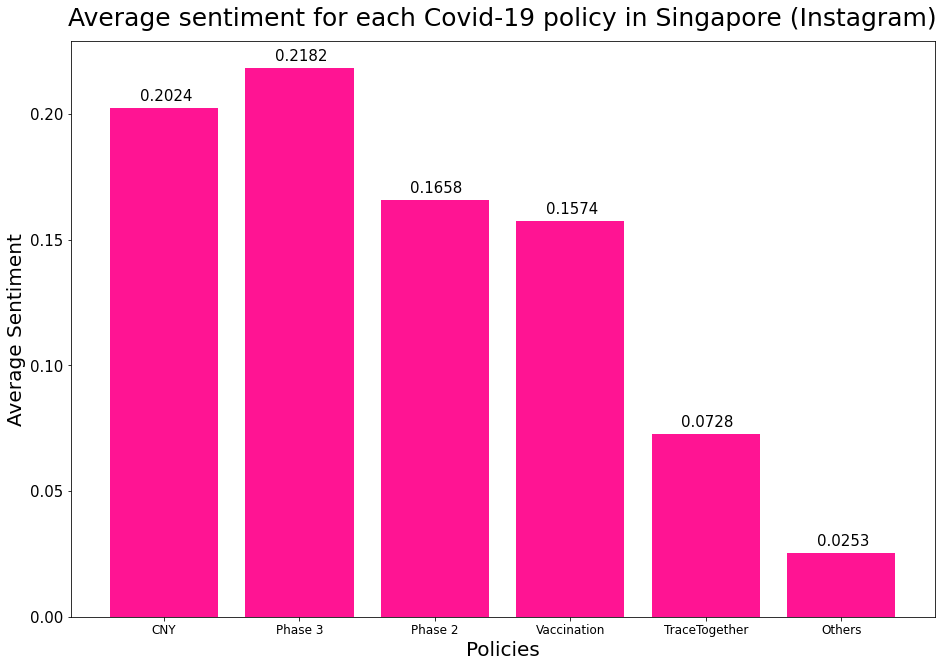

In [130]:
fig = plt.figure()
ax = fig.add_axes([0, 0,2,2])
key_words = list(insta_keywords_compound_sentiment.keys())
avg_sentiment = list(insta_keywords_compound_sentiment.values())
ax.bar(key_words, avg_sentiment, color='deeppink')
# plt.plot(key_words, avg_sentiment, color='midnightblue', marker='o')
plt.title("Average sentiment for each Covid-19 policy in Singapore (Instagram)", fontsize = 25, pad=15)
plt.xlabel("Policies", fontsize = 20)
plt.ylabel("Average Sentiment",fontsize = 20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
# plt.grid(True)
for i in range(len(key_words)):
    plt.text(x= i-0.18 , y = avg_sentiment[i]+0.003 , s=f"{avg_sentiment[i]}" , fontdict=dict(fontsize=15))

plt.tight_layout()
plt.show()

In [147]:
analysis = TextBlob('Be very careful of new variant, they will derail vaccination program . More enforcement of imported cases')

In [152]:
analysis.sentiment

Sentiment(polarity=0.1687878787878788, subjectivity=0.6515151515151515)